In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
train=pd.read_csv('termdeposit_train.csv')
test=pd.read_csv('termdeposit_test.csv')

In [46]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [47]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [48]:
a=train.shape[0]+test.shape[0]

In [49]:
a

45211

In [50]:
print((train.shape[0]/a)*100,'---------',test.shape[0]/a*100)

69.99845170423127 --------- 30.001548295768725


In [51]:
train.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [52]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [53]:
for i in train.columns:
    print(train[i].value_counts())
    print('\n')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

In [54]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [55]:
for i in train.columns:
    if train[i].dtype=='object':
        train[i]=oe.fit_transform(train[i].values.reshape(-1,1))

In [56]:
train.describe()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,13075.936990,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,11218.000000,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,22519.000000,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,33879.500000,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,45211.000000,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [57]:
train.drop(columns='ID',inplace=True)

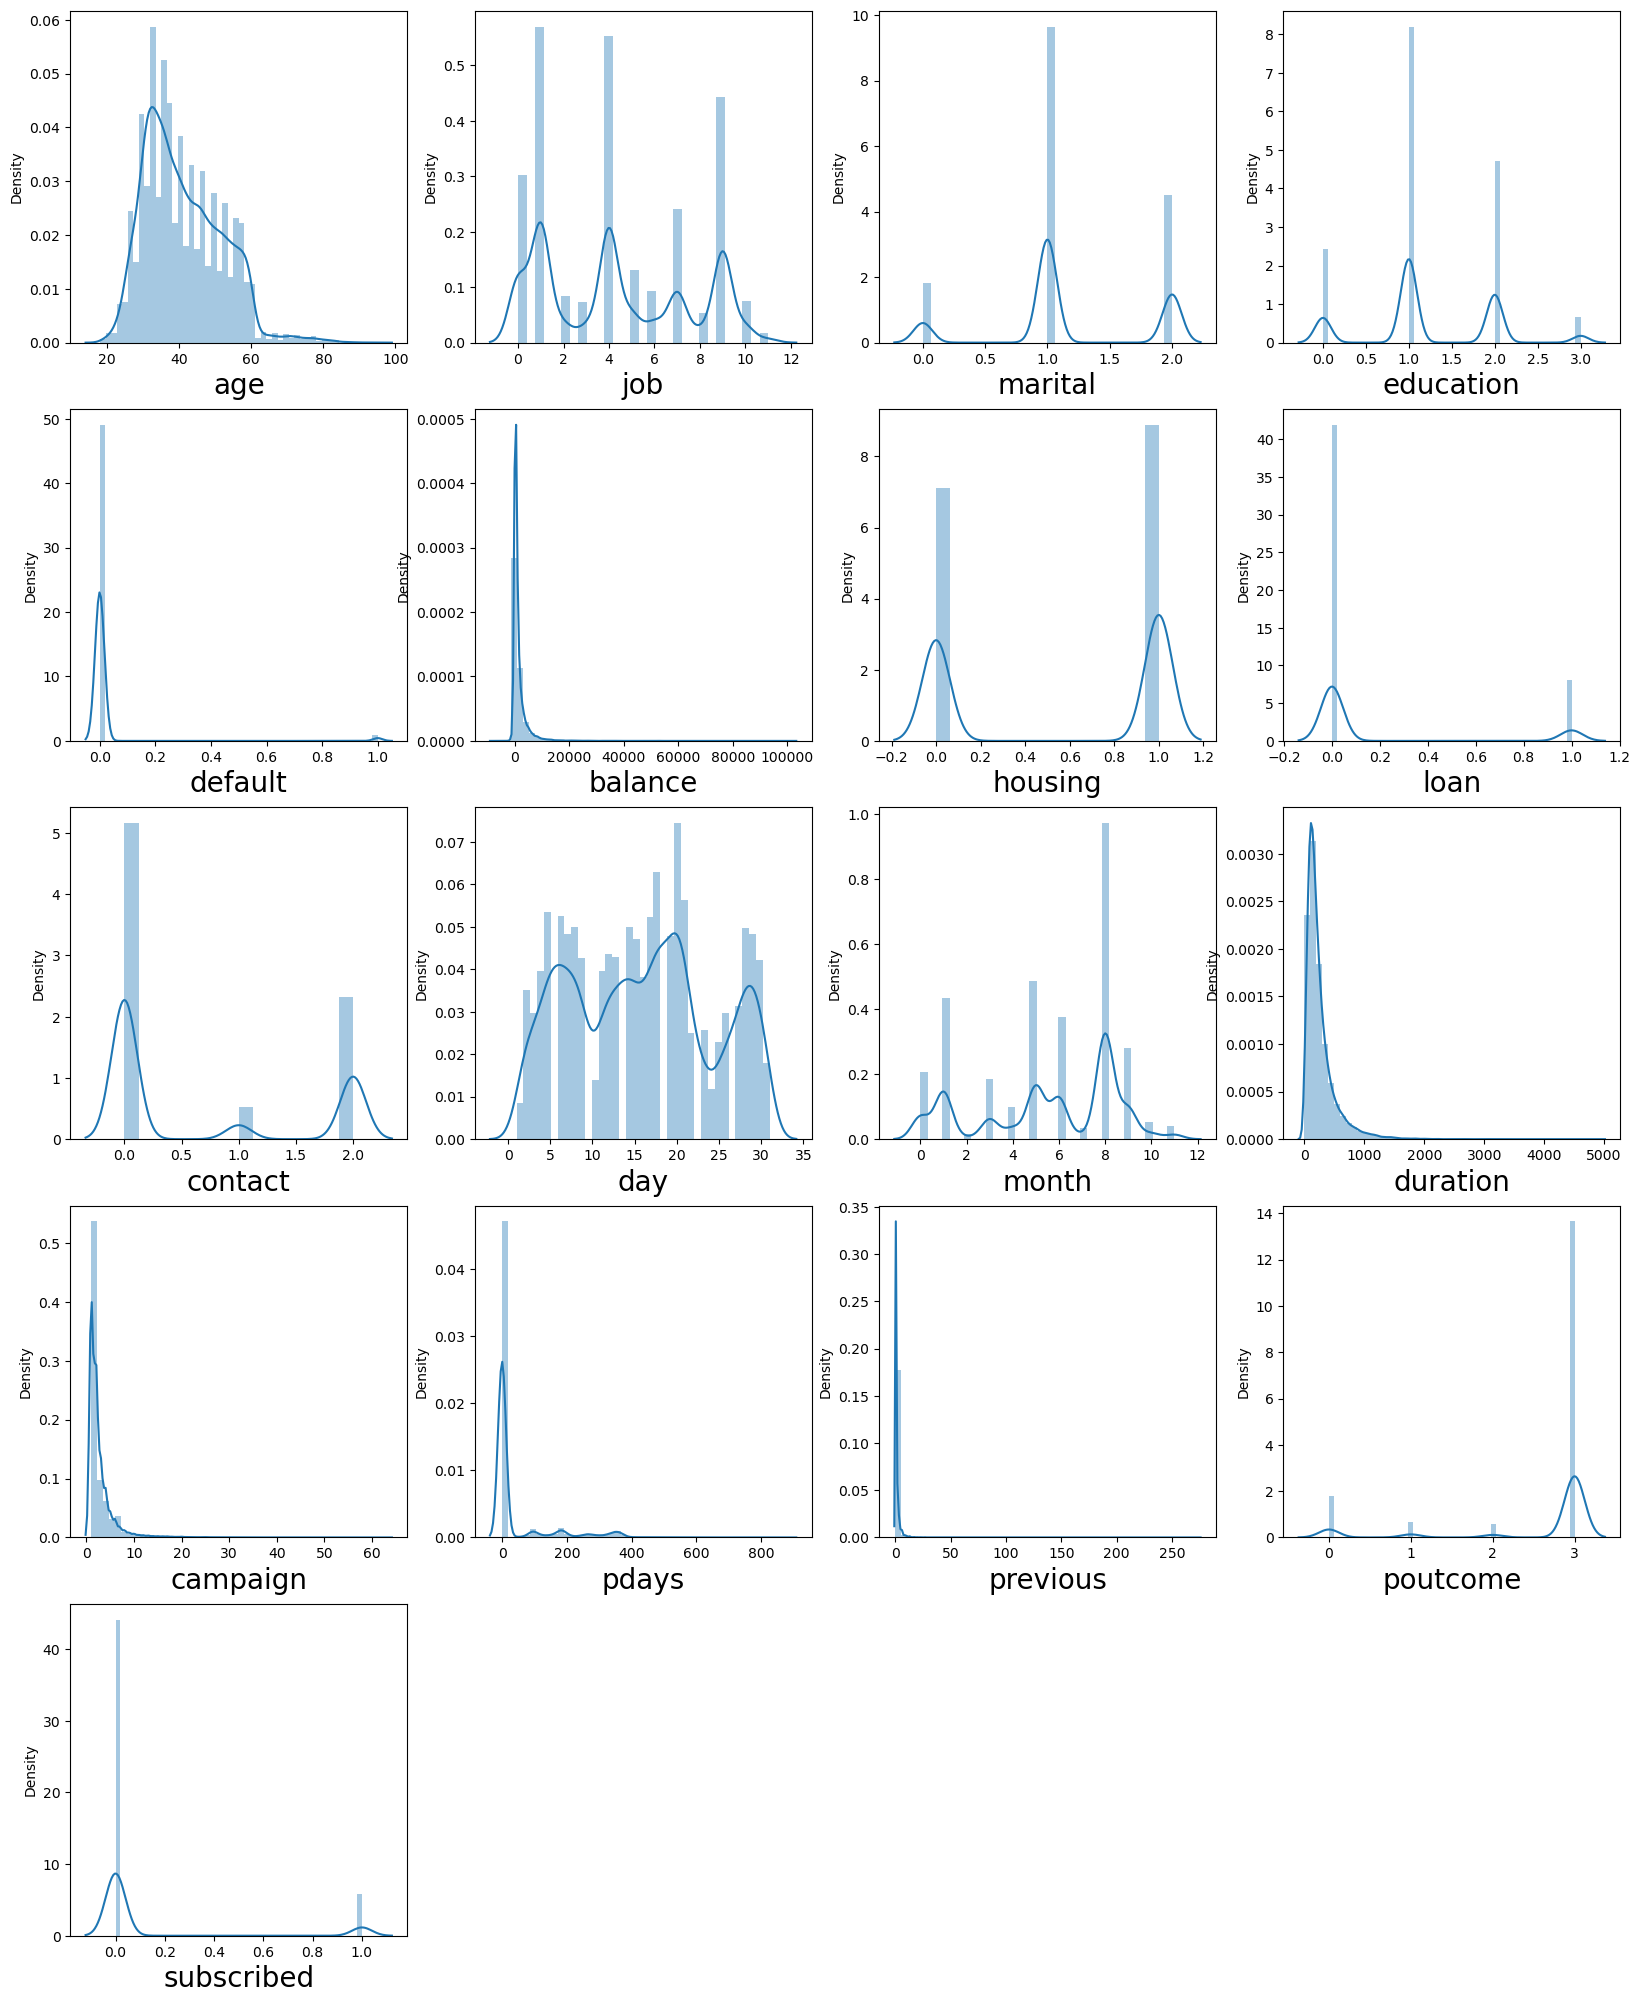

In [58]:
plt.figure(figsize=(20,25),facecolor='w')
plot=1
for i in train.columns:
    if plot<=20:
        ax=plt.subplot(5,4,plot)
        sns.distplot(train[i])
        plt.xlabel(i,fontsize=20)
        
    plot+=1
plt.show()

In [59]:
train.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

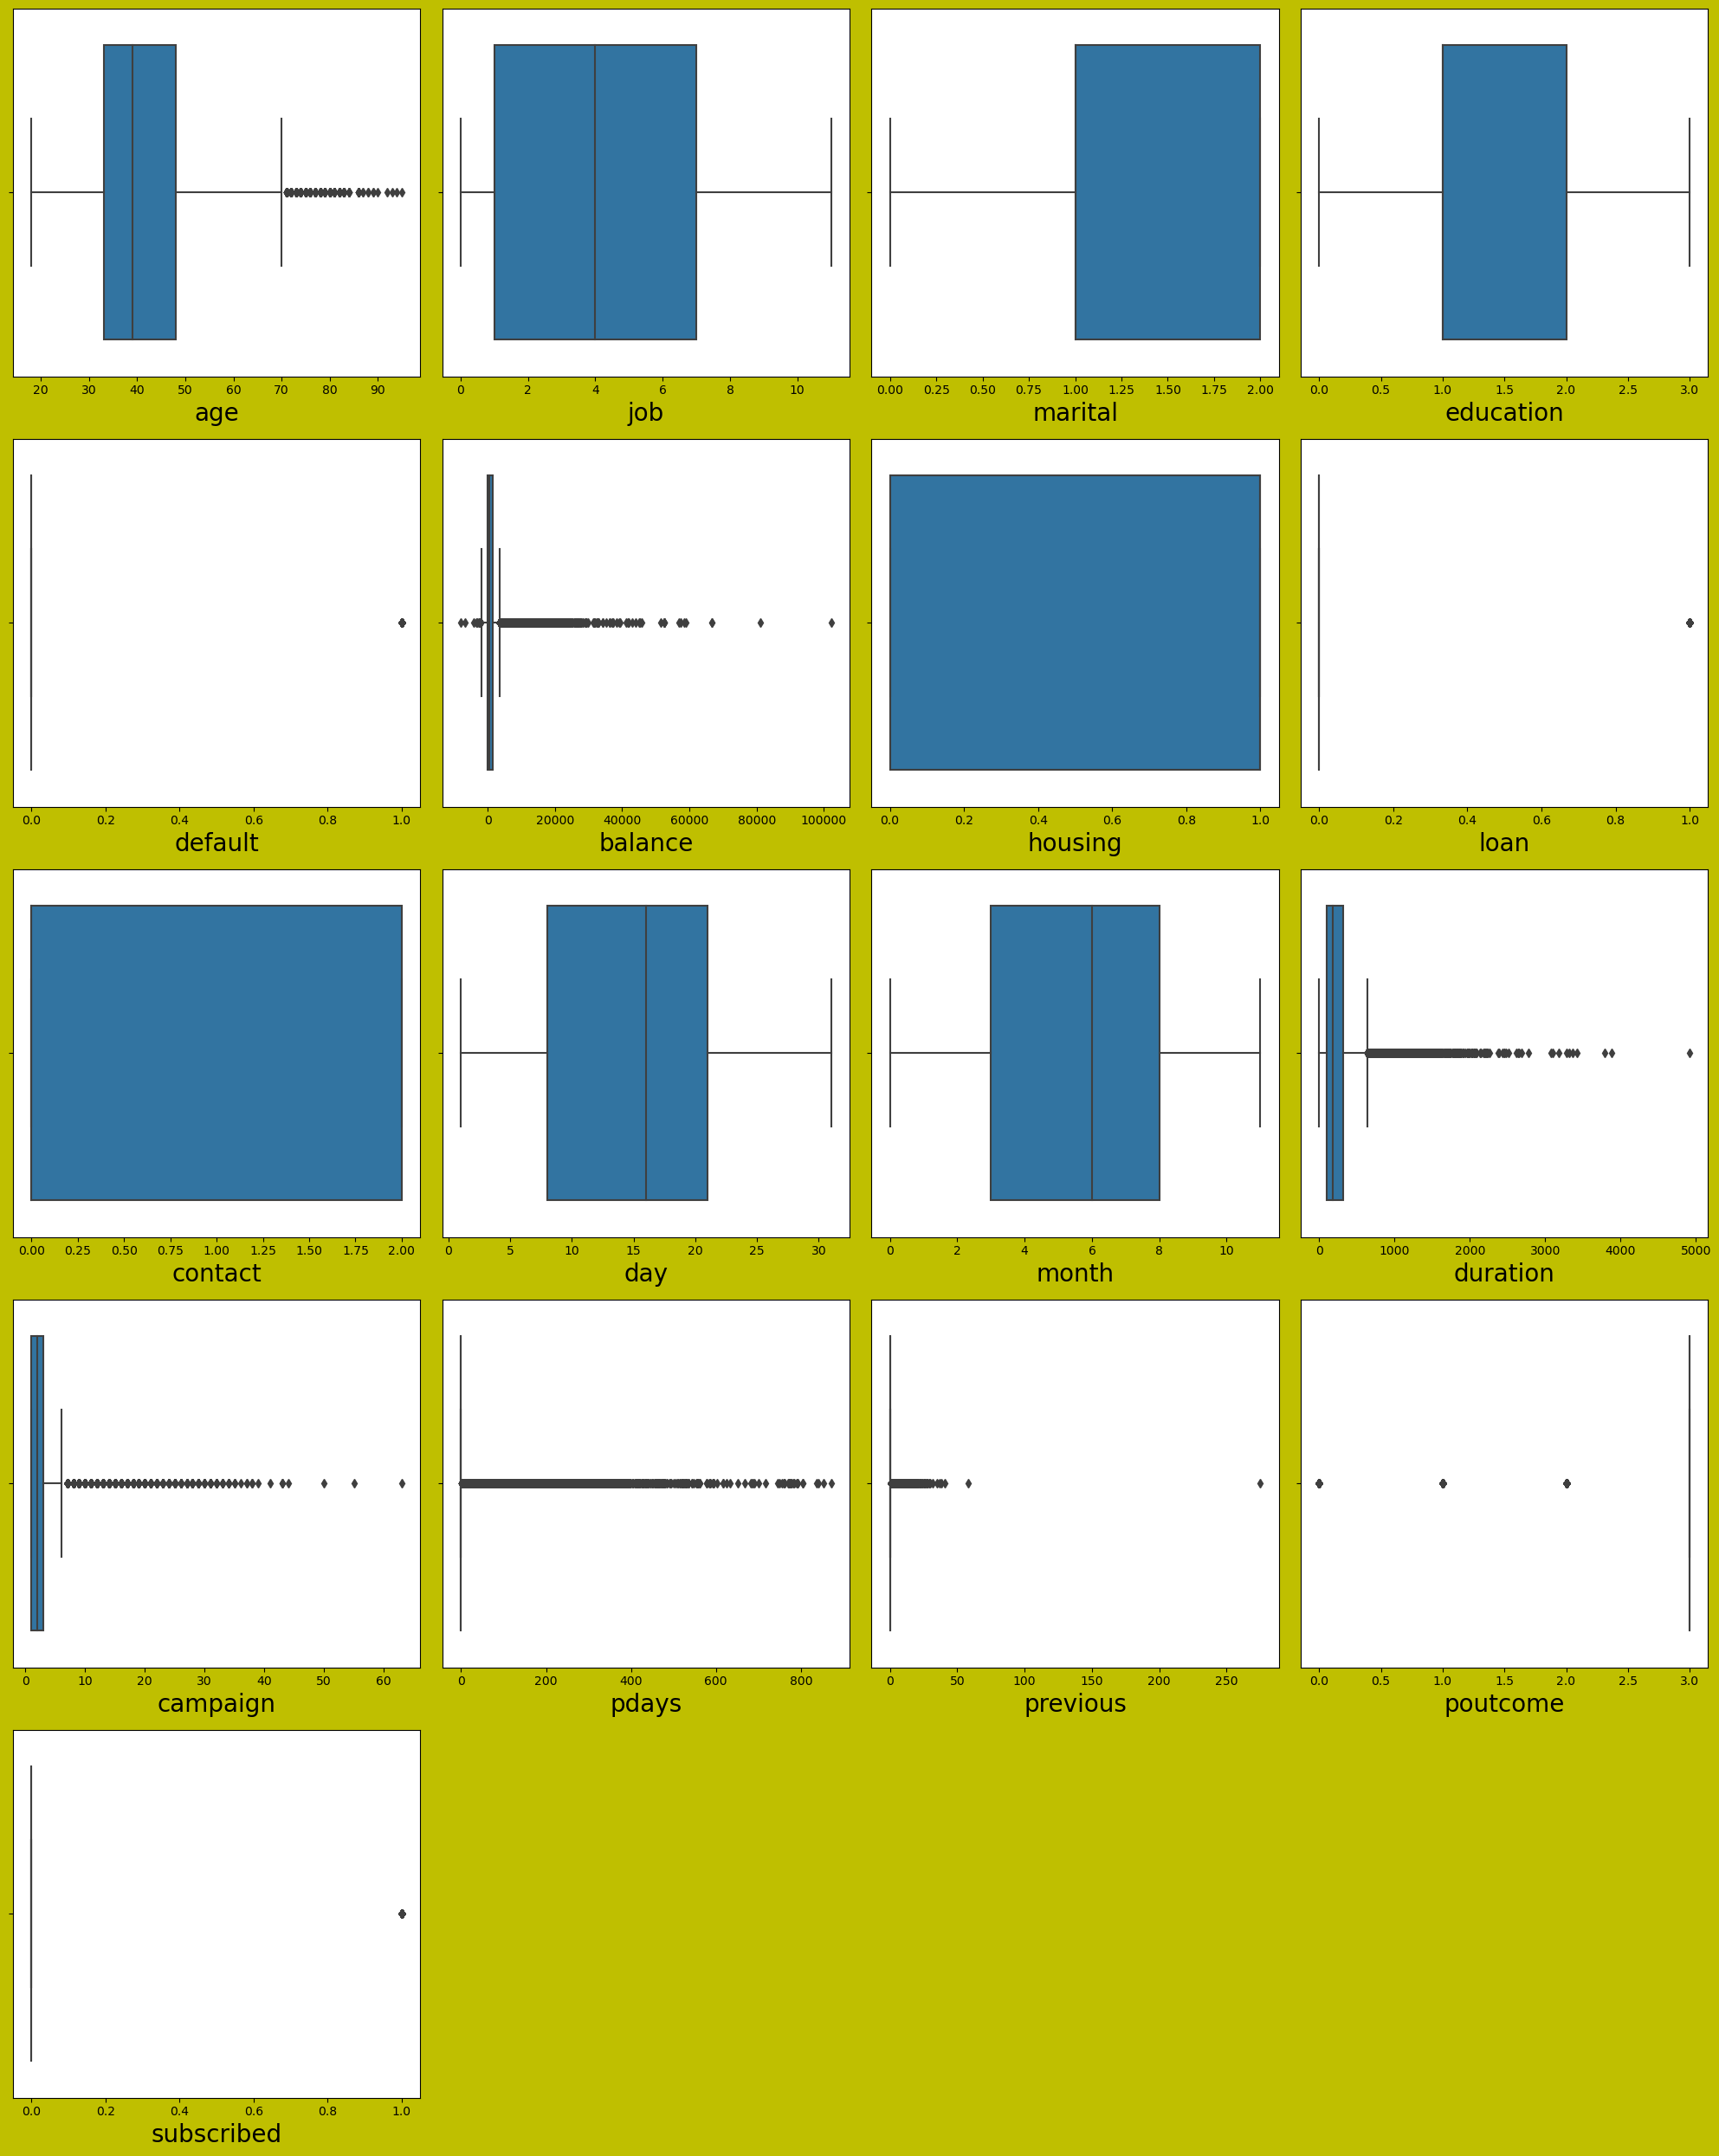

In [60]:
plt.figure(figsize=(20,25),facecolor='y')
plot=1
for i in train.columns:
    if plot<=20:
        ax=plt.subplot(5,4,plot)
        sns.boxplot(train[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.tight_layout()

In [61]:
q1=train.quantile(.25)
q3=train.quantile(.75)
iqr=q3-q1
iqr

age             15.0
job              6.0
marital          1.0
education        1.0
default          0.0
balance       1358.0
housing          1.0
loan             0.0
contact          2.0
day             13.0
month            5.0
duration       214.5
campaign         2.0
pdays            0.0
previous         0.0
poutcome         0.0
subscribed       0.0
dtype: float64

In [62]:
train['age'].value_counts()

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64

In [63]:
a_h=q3.age+(1.8*iqr.age)
ind_num=np.where(a_h<train['age'])
train=train.drop(train.index[ind_num])
train.reset_index()
train.shape

(31460, 17)

In [64]:
train['default'].value_counts()

0.0    30875
1.0      585
Name: default, dtype: int64

In [65]:
train['balance'].value_counts()

 0        2448
 1         136
 2         109
 4          95
 3          88
          ... 
 8311        1
 37378       1
 2192        1
-715         1
 2968        1
Name: balance, Length: 6306, dtype: int64

In [66]:
b_h=q3.balance+(1.8*iqr.balance)
ind_num=np.where(b_h<train['balance'])
train=train.drop(train.index[ind_num])
train.reset_index()
train.shape

(28648, 17)

In [67]:
train['balance'].value_counts()

 0       2448
 1        136
 2        109
 4         95
 3         88
         ... 
-961        1
 3309       1
 2674       1
-1310       1
 2968       1
Name: balance, Length: 4196, dtype: int64

In [68]:
b_l=q3.balance-(1.8*iqr.balance)
ind_num=np.where(b_l>train['balance'])
train=train.drop(train.index[ind_num])
train.reset_index()
train.shape

(28550, 17)

In [69]:
train['balance'].value_counts()

0       2448
1        136
2        109
4         95
3         88
        ... 
2052       1
2018       1
2244       1
2958       1
2968       1
Name: balance, Length: 4109, dtype: int64

In [70]:
train['duration'].value_counts()

104     120
124     120
90      118
88      117
112     115
       ... 
805       1
1462      1
1276      1
1029      1
1973      1
Name: duration, Length: 1412, dtype: int64

In [71]:
d_h=q3.duration+(1.8*iqr.duration)
ind_num=np.where(d_h<train['duration'])
train=train.drop(train.index[ind_num])
train.reset_index()
train.shape

(26944, 17)

In [72]:
train['campaign'].value_counts()

1     10475
2      7456
3      3243
4      2099
5      1067
6       779
7       439
8       304
9       198
10      159
11      103
12       89
13       79
14       61
15       56
16       49
17       43
20       32
18       31
19       26
22       18
21       16
28       14
25       13
23       12
29       11
24       11
26        9
31        8
27        7
30        6
32        6
33        5
34        5
38        3
43        3
35        2
37        2
41        1
50        1
44        1
36        1
39        1
Name: campaign, dtype: int64

In [73]:
c_h=q3.campaign+(1.8*iqr.campaign)
ind_num=np.where(c_h<train['campaign'])
train=train.drop(train.index[ind_num])
train.reset_index()
train.shape

(25119, 17)

In [74]:
train['pdays'].value_counts()

-1      20392
 182       91
 92        82
 91        72
 183       63
        ...  
 25         1
 526        1
 603        1
 687        1
 382        1
Name: pdays, Length: 491, dtype: int64

In [75]:
p_h=q3.pdays+(1.8*iqr.pdays)
ind_num=np.where(p_h<train['pdays'])
train=train.drop(train.index[ind_num])
train.reset_index()
train.shape

(20392, 17)

In [76]:
train['previous'].value_counts()

0    20392
Name: previous, dtype: int64

In [77]:
train['poutcome'].value_counts()

3.0    20392
Name: poutcome, dtype: int64

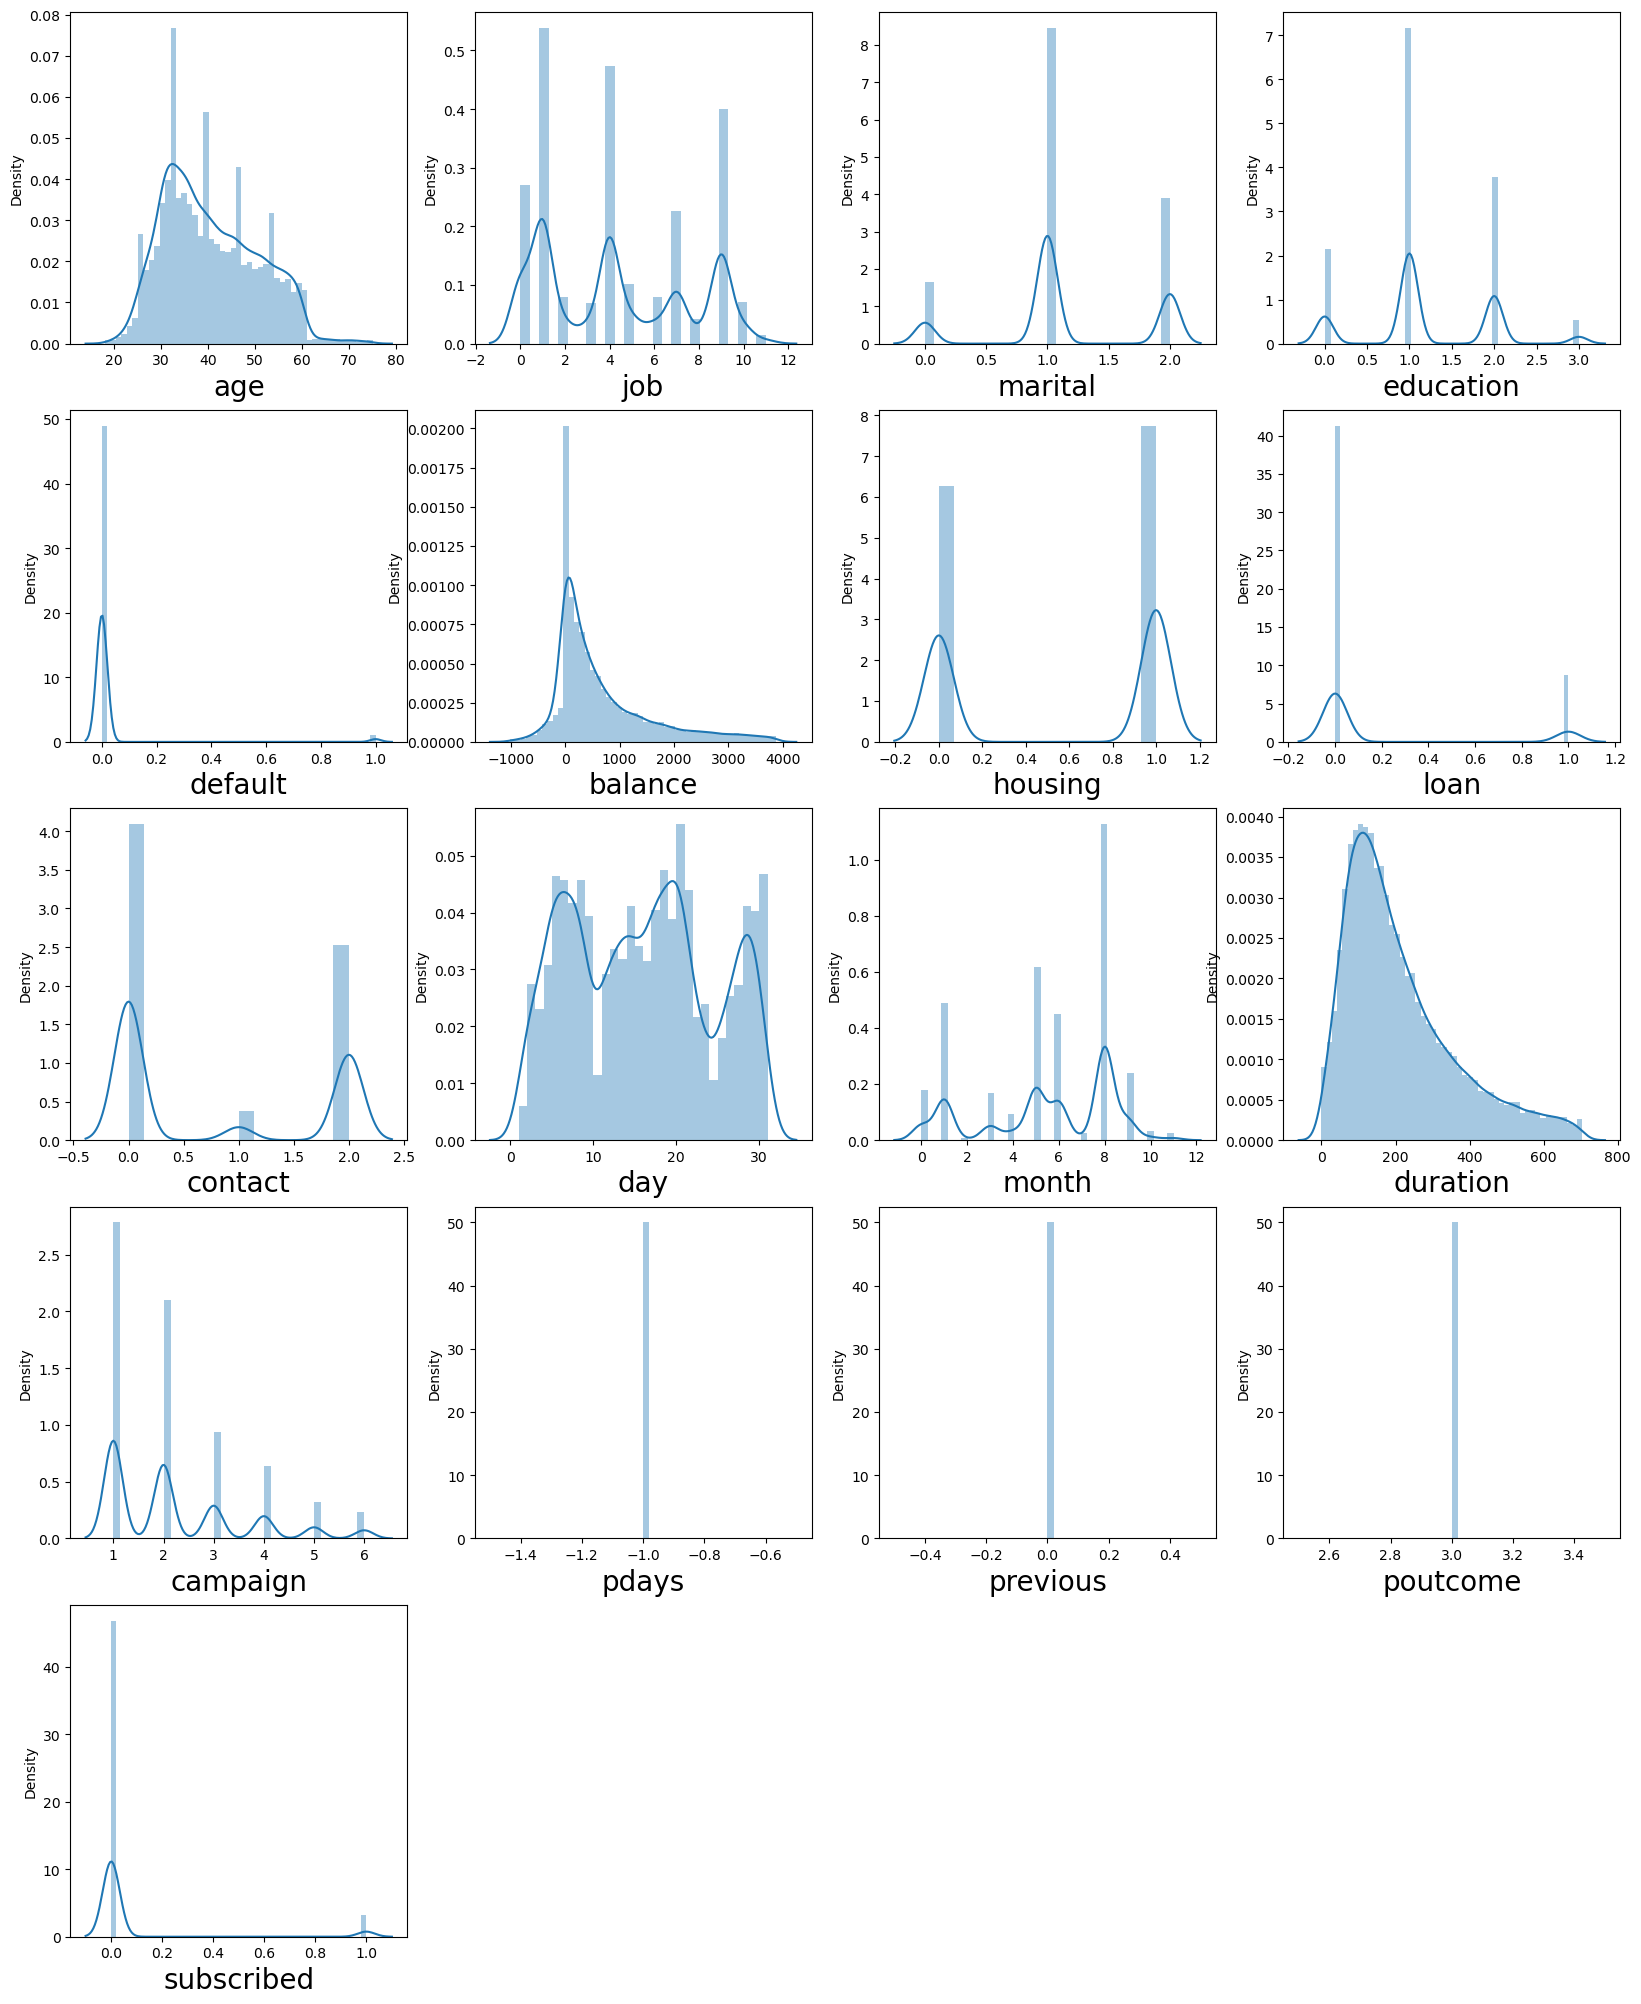

In [78]:
plt.figure(figsize=(20,25),facecolor='w')
plot=1
for i in train.columns:
    if plot<=20:
        ax=plt.subplot(5,4,plot)
        sns.distplot(train[i])
        plt.xlabel(i,fontsize=20)
        
    plot+=1
plt.show()

In [79]:
train.skew()

age           0.445596
job           0.283233
marital      -0.096121
education     0.237252
default       6.626192
balance       1.501749
housing      -0.213461
loan          1.715995
contact       0.459736
day           0.102728
month        -0.559510
duration      1.142557
campaign      1.160982
pdays         0.000000
previous      0.000000
poutcome      0.000000
subscribed    3.583387
dtype: float64

In [80]:
train['balance']=np.cbrt(train['balance'])
train['loan']=np.cbrt(train['loan'])
train['duration']=np.cbrt(train['duration'])
train['campaign']=np.cbrt(train['campaign'])

In [81]:
for i in test.columns:
    if test[i].dtype=='object':
        test[i]=oe.fit_transform(test[i].values.reshape(-1,1))

In [82]:

y_train=train.subscribed

In [83]:
train=train.drop(columns='subscribed')

In [84]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [85]:
train=pd.DataFrame(ss.fit_transform(train),columns=train.columns)

In [86]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.548064,-1.303454,-0.264100,2.420731,-0.147638,1.151326,-1.112401,-0.459659,0.237115,0.383358,1.207530,-1.510464,0.042570,0.0,0.0,0.0
1,-0.946998,2.031519,-0.264100,-0.266452,-0.147638,-0.845067,-1.112401,-0.459659,-0.820000,0.502630,-0.188306,-0.817538,0.042570,0.0,0.0,0.0
2,-1.346208,0.818802,-0.264100,-0.266452,-0.147638,0.637610,0.898956,-0.459659,-0.820000,0.264086,-0.188306,0.411721,-1.015051,0.0,0.0,0.0
3,-0.946998,1.425160,-0.264100,-0.266452,-0.147638,-0.214968,0.898956,-0.459659,-0.820000,-1.405720,-0.886224,1.148401,-1.015051,0.0,0.0,0.0
4,-0.747393,-0.090737,1.380838,1.077140,-0.147638,-1.106472,0.898956,-0.459659,-0.820000,-1.644264,-0.886224,-0.546083,0.784467,0.0,0.0,0.0


In [87]:
test=pd.DataFrame(ss.fit_transform(test),columns=test.columns)

In [88]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.211134,-0.838114,0.807551,-0.276592,-0.301053,-0.131336,-0.402389,0.893033,-0.429564,-0.704444,-0.089124,0.829938,-0.921849,1.058702,-0.418199,-0.2975,0.452163
1,1.362131,3.499987,0.196760,-1.914173,-1.642982,-0.131336,0.463375,-1.119779,-0.429564,0.413763,-1.778340,-0.165753,0.439963,-0.574850,-0.418199,-0.2975,0.452163
2,-1.461882,-0.932421,0.502156,1.360988,1.040875,-0.131336,-0.393955,0.893033,-0.429564,1.531969,0.031534,0.829938,1.616074,-0.574850,-0.418199,-0.2975,0.452163
3,1.132710,1.519549,0.807551,1.360988,-1.642982,-0.131336,0.784508,0.893033,-0.429564,0.413763,-0.330440,0.829938,-0.747754,-0.248140,-0.418199,-0.2975,0.452163
4,-0.783238,0.387871,-1.024823,-1.914173,-0.301053,-0.131336,-0.669352,-1.119779,2.327941,1.531969,-1.537023,-0.165753,-0.569789,-0.574850,-0.418199,-0.2975,0.452163


In [89]:
print(train.shape,'----------',test.shape)

(20392, 16) ---------- (13564, 17)


In [90]:
test.drop(columns='ID',inplace=True)

In [131]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.838114,0.807551,-0.276592,-0.301053,-0.131336,-0.402389,0.893033,-0.429564,-0.704444,-0.089124,0.829938,-0.921849,1.058702,-0.418199,-0.2975,0.452163
1,3.499987,0.196760,-1.914173,-1.642982,-0.131336,0.463375,-1.119779,-0.429564,0.413763,-1.778340,-0.165753,0.439963,-0.574850,-0.418199,-0.2975,0.452163
2,-0.932421,0.502156,1.360988,1.040875,-0.131336,-0.393955,0.893033,-0.429564,1.531969,0.031534,0.829938,1.616074,-0.574850,-0.418199,-0.2975,0.452163
3,1.519549,0.807551,1.360988,-1.642982,-0.131336,0.784508,0.893033,-0.429564,0.413763,-0.330440,0.829938,-0.747754,-0.248140,-0.418199,-0.2975,0.452163
4,0.387871,-1.024823,-1.914173,-0.301053,-0.131336,-0.669352,-1.119779,2.327941,1.531969,-1.537023,-0.165753,-0.569789,-0.574850,-0.418199,-0.2975,0.452163


In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [95]:
vif=pd.DataFrame()

In [96]:
vif['vif_values']=[variance_inflation_factor(train.values,i) for i in range(len(train.columns))]
vif['feature']=train.columns

In [97]:
vif

,vif_values,feature
0,1.273788,age
1,1.051493,job
2,1.228023,marital
3,1.065102,education
4,1.048321,default
5,1.070519,balance
6,1.205206,housing
7,1.022270,loan
8,1.304711,contact
9,1.022521,day


In [100]:
y_train.value_counts()

0.0    19099
1.0     1293
Name: subscribed, dtype: int64

In [101]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [104]:
lr.fit(train,y_train)

LogisticRegression()

In [105]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [107]:
pred=lr.predict(test)

In [111]:
pred.shape

(13564,)

In [112]:
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [114]:
import joblib
joblib.dump(pred,'test_score.pkl')

['test_score.pkl']

In [115]:
model=joblib.load('test_score.pkl')

In [134]:
model

array([0., 0., 0., ..., 0., 0., 0.])

In [136]:
np.unique(pred)

array([0., 1.])

In [137]:
print(pred.view())

[0. 0. 0. ... 0. 0. 0.]


In [142]:
yes=np.count_nonzero(pred==1)
yes

370

In [143]:
no=np.count_nonzero(pred==0)
no

13194

In [144]:
yes+no

13564

In [145]:
test.shape

(13564, 16)

In [146]:
pred.shape

(13564,)